#DO NOT REMOVE THIS TEXT(FOR REFERENCE)


Great, it sounds like you've made good progress by merging the CSV files and preparing the data with the feature descriptions and labels. After this step, here's what you can do next:

1. **Handle Missing Values**: Check if there are any missing values in your merged dataframes (`traindf` and `testdf`). If there are, decide on an appropriate strategy for handling them, such as imputation or removal of rows with missing values.

2. **Normalize or Scale Features**: Since you have numeric features, it's a good practice to normalize or scale them to ensure that they're on a similar scale. This can improve the performance of certain machine learning algorithms, especially those sensitive to the scale of features. You can use techniques like Min-Max scaling or standardization.

3. **Split Data**: Separate the features (acoustic features) from the target variables (depression labels and gender labels) in both the training and test data. This will allow you to train and evaluate your machine learning models properly.

4. **Train ML Models**:
   - For depression classification:
     - Choose a suitable machine learning algorithm (e.g., logistic regression, random forest, support vector machine) and train it on the training data with the depression labels as the target variable.
   - For gender classification:
     - Similarly, choose an appropriate ML algorithm and train it on the training data with the gender labels as the target variable.

5. **Evaluate Model Performance**:
   - After training the models, use them to predict depression labels for the test data in the depression classification task and gender labels for the gender classification task.
   - Calculate the simple classification accuracy (`A`) and the balanced classification accuracy (`BA`) on the test set for both tasks.
   - Compute these metrics separately for female and male participants to assess performance across gender groups.
   - Additionally, calculate the equality of opportunity (`EO`) for depression classification as described in the task.

6. **Discuss Findings**: Interpret the results of your classification experiments, including accuracy, balanced accuracy, and equality of opportunity. Discuss any observations or insights gained from the evaluation metrics, particularly regarding gender bias and performance differences across gender groups.

In [1]:
#importing required libaries
import pandas as pd
import numpy as np

from scipy.stats import shapiro #for Shapiro-Wilk test

In [ ]:
#unzipping the training and testing files
!unzip features_train.zip
!unzip features_test.zip

Archive:  features_train.zip
   creating: features_train/
  inflating: features_train/spk_448.csv  
  inflating: features_train/spk_475.csv  
  inflating: features_train/spk_313.csv  
  inflating: features_train/spk_449.csv  
  inflating: features_train/spk_339.csv  
  inflating: features_train/spk_463.csv  
  inflating: features_train/spk_488.csv  
  inflating: features_train/spk_304.csv  
  inflating: features_train/spk_310.csv  
  inflating: features_train/spk_338.csv  
  inflating: features_train/spk_328.csv  
  inflating: features_train/.DS_Store  
  inflating: __MACOSX/features_train/._.DS_Store  
  inflating: features_train/spk_473.csv  
  inflating: features_train/spk_303.csv  
  inflating: features_train/spk_317.csv  
  inflating: features_train/spk_471.csv  
  inflating: features_train/spk_459.csv  
  inflating: features_train/spk_316.csv  
  inflating: __MACOSX/features_train/._spk_316.csv  
  inflating: features_train/spk_464.csv  
  inflating: features_train/spk_371.csv  


In [ ]:
file = "spk_319.csv"

In [ ]:
file

'spk_319.csv'

In [ ]:
col_list = []
for i in range(88):
  col_list.append(str(i))

In [ ]:
import os
def prepare_data(directory, label_directory):
  df = pd.DataFrame()
  labels_df = pd.read_csv(label_directory)
  labels_df = labels_df.dropna()
  labels_df['Participant_ID'] = labels_df['Participant_ID'].astype('int').astype('str')
  files = os.listdir(directory)
  for file in files:
    if file.endswith(".csv"):
      personID = file.split("spk_")[-1].split(".csv")[0]
      file_path = os.path.join(directory,file)
      person_df = pd.read_csv(file_path, header = None)
      person_df.columns = col_list
      person_df['Participant_ID'] = personID
      person_df_with_id = person_df.merge(labels_df, on= 'Participant_ID', how='inner')
      df = pd.concat([df, person_df_with_id])

  return df  # returning the dataframe of all csv files after conacatenating of a passed directory

In [ ]:
traindf = prepare_data('/content/features_train', '/content/labels.csv')
testdf = prepare_data('/content/features_test', '/content/labels.csv')

In [ ]:
traindf

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,Participant_ID,Depression,Gender
0,31.390165,0.018098,31.188343,31.197962,31.201588,0.013245,41.679012,21.395348,11.952332,0.000000,...,3.658537,2.631579,0.260000,0.000000,0.210000,0.000000,-51.550144,380,1,1
1,23.609598,0.235042,19.488503,21.227968,29.168144,9.679642,17.519838,0.000000,91.759990,0.000000,...,2.941176,3.174603,0.105000,0.065000,0.123333,0.091043,-35.146545,380,1,1
2,27.727968,0.163010,23.439390,26.050080,32.296745,8.857355,29.801428,16.211067,96.715670,123.633675,...,1.763668,1.423488,0.362500,0.243143,0.320000,0.472229,-30.232220,380,1,1
3,23.380957,0.082736,21.488737,22.847275,25.291330,3.802593,55.655178,42.349197,13.849959,8.132806,...,4.545454,2.844639,0.194615,0.118362,0.126429,0.094688,-35.298520,380,1,1
4,24.018930,0.097692,21.600746,23.845823,25.830982,4.230236,66.412320,75.839950,13.896914,4.520186,...,4.028436,1.438849,0.410000,0.250466,0.261667,0.298687,-32.107998,380,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,30.855850,0.146404,31.370277,32.204617,32.830807,1.460529,425.862730,298.006300,17.754452,0.000000,...,3.370787,1.734104,0.060000,0.024495,0.290000,0.299867,-49.159950,402,1,0
155,30.009224,0.211993,25.419390,31.258736,32.203210,6.783819,193.476500,144.112780,67.054970,29.852142,...,3.562945,2.163462,0.170000,0.136463,0.244000,0.280649,-49.650467,402,1,0
156,26.695618,0.249096,20.711163,21.202562,32.986557,12.275394,3.885885,20.445360,39.591820,8.765488,...,4.075235,2.555911,0.226250,0.149578,0.164286,0.122924,-45.998047,402,1,0
157,29.344700,0.157697,23.746610,31.692345,32.241340,8.494730,158.884050,147.503850,82.614440,71.302420,...,4.674797,2.258727,0.196364,0.147665,0.206667,0.240705,-48.748863,402,1,0


In [ ]:
traindf =  traindf.reset_index(drop=True)
testdf =  testdf.reset_index(drop=True)

In [ ]:
traindf.isnull().sum() #checking if there are any null values in training data

0                 1
1                 1
2                 1
3                 1
4                 1
                 ..
86                1
87                1
Participant_ID    0
Depression        0
Gender            0
Length: 91, dtype: int64

In [ ]:
testdf.isnull().sum() #checking if there are any null values in testing data

0                 0
1                 0
2                 0
3                 0
4                 0
                 ..
86                0
87                0
Participant_ID    0
Depression        0
Gender            0
Length: 91, dtype: int64

In [ ]:
rows_with_missing_values_train = traindf[traindf.isnull().any(axis=1)]
print(rows_with_missing_values_train)  #printing rows with missing values

        0   1   2   3   4   5   6   7   8   9  ...  81  82  83  84  85  86  \
13496 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN   

       87  Participant_ID  Depression  Gender  
13496 NaN             402           1       0  

[1 rows x 91 columns]


In [ ]:
rows_with_missing_values_test = testdf[testdf.isnull().any(axis=1)]
print(rows_with_missing_values_test) #printing rows with missing values

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, Participant_ID, Depression, Gender]
Index: []

[0 rows x 91 columns]


In [ ]:
traindf = traindf.dropna()
print(traindf) #dropping the row with null values in traindf

               0         1          2          3          4          5  \
0      31.390165  0.018098  31.188343  31.197962  31.201588   0.013245   
1      23.609598  0.235042  19.488503  21.227968  29.168144   9.679642   
2      27.727968  0.163010  23.439390  26.050080  32.296745   8.857355   
3      23.380957  0.082736  21.488737  22.847275  25.291330   3.802593   
4      24.018930  0.097692  21.600746  23.845823  25.830982   4.230236   
...          ...       ...        ...        ...        ...        ...   
13621  30.855850  0.146404  31.370277  32.204617  32.830807   1.460529   
13622  30.009224  0.211993  25.419390  31.258736  32.203210   6.783819   
13623  26.695618  0.249096  20.711163  21.202562  32.986557  12.275394   
13624  29.344700  0.157697  23.746610  31.692345  32.241340   8.494730   
13625  31.335007  0.091054  29.839437  32.270004  33.518517   3.679079   

                6           7           8           9  ...        81  \
0       41.679012   21.395348   11.9523

In [ ]:
traindf.isnull().sum() #checking if we are able to remove all null values

0                 0
1                 0
2                 0
3                 0
4                 0
                 ..
86                0
87                0
Participant_ID    0
Depression        0
Gender            0
Length: 91, dtype: int64

In [ ]:
traindf.to_csv("train_data.csv")

In [ ]:
testdf.to_csv("test_data.csv")

In [ ]:
feature_description = pd.read_csv("feature_description.csv", encoding='ISO-8859-1',header=None)
feature_description

,0,1
0,F0semitoneFrom27.5Hz_sma3nz_amean,mean logarithmic F0 on a semitone frequency sc...
1,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,standard deviation of logarithmic F0 on a semi...
2,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,20th percentile of logarithmic F0 on a semiton...
3,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,50th percentile of logarithmic F0 on a semiton...
4,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,80th percentile of logarithmic F0 on a semiton...
...,...,...
83,MeanVoicedSegmentLengthSec,mean length of continuously voiced regions (F0...
84,StddevVoicedSegmentLengthSec,standard deviation of continuously voiced regi...
85,MeanUnvoicedSegmentLength,mean length of continuously unvoiced regions (...
86,StddevUnvoicedSegmentLength,standard deviation of continuously unvoiced re...


In [ ]:
feature_names = feature_description.iloc[:, 0].tolist()

additional_headers = ['Participant_ID', 'Depression', 'Gender']
full_headers = feature_names + additional_headers #giving all the column names to the variable.

In [ ]:
traindf.columns = full_headers
testdf.columns = full_headers #assigning the column names for the traindf and testdf

In [ ]:
traindf.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender
0,31.390165,0.018098,31.188343,31.197962,31.201588,0.013245,41.679012,21.395348,11.952332,0.000000,...,3.658537,2.631579,0.260000,0.000000,0.210000,0.000000,-51.550144,380,1,1
1,23.609598,0.235042,19.488503,21.227968,29.168144,9.679642,17.519838,0.000000,91.759990,0.000000,...,2.941176,3.174603,0.105000,0.065000,0.123333,0.091043,-35.146545,380,1,1
2,27.727968,0.163010,23.439390,26.050080,32.296745,8.857355,29.801428,16.211067,96.715670,123.633675,...,1.763668,1.423488,0.362500,0.243143,0.320000,0.472229,-30.232220,380,1,1
3,23.380957,0.082736,21.488737,22.847275,25.291330,3.802593,55.655178,42.349197,13.849959,8.132806,...,4.545454,2.844639,0.194615,0.118362,0.126429,0.094688,-35.298520,380,1,1
4,24.018930,0.097692,21.600746,23.845823,25.830982,4.230236,66.412320,75.839950,13.896914,4.520186,...,4.028436,1.438849,0.410000,0.250466,0.261667,0.298687,-32.107998,380,1,1


In [ ]:
traindf['Participant_ID'].value_counts() # checking if there are unique records for a particular participant or not

Participant_ID
364    386
380    368
464    367
372    328
366    286
      ... 
340     68
338     63
347     58
385     55
360     42
Name: count, Length: 87, dtype: int64

In [ ]:
traindf['Participant_ID'].value_counts().min()

42

In [ ]:
traindf['Participant_ID'].value_counts().max()

386

In [ ]:
traindf['Depression'].value_counts()

Depression
0    9693
1    3932
Name: count, dtype: int64

As the data is like 25% and 75% for 0 and 1 labels in depression , we are not doing undersmapling or oversampling.

In [ ]:
traindf.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender
0,31.390165,0.018098,31.188343,31.197962,31.201588,0.013245,41.679012,21.395348,11.952332,0.000000,...,3.658537,2.631579,0.260000,0.000000,0.210000,0.000000,-51.550144,380,1,1
1,23.609598,0.235042,19.488503,21.227968,29.168144,9.679642,17.519838,0.000000,91.759990,0.000000,...,2.941176,3.174603,0.105000,0.065000,0.123333,0.091043,-35.146545,380,1,1
2,27.727968,0.163010,23.439390,26.050080,32.296745,8.857355,29.801428,16.211067,96.715670,123.633675,...,1.763668,1.423488,0.362500,0.243143,0.320000,0.472229,-30.232220,380,1,1
3,23.380957,0.082736,21.488737,22.847275,25.291330,3.802593,55.655178,42.349197,13.849959,8.132806,...,4.545454,2.844639,0.194615,0.118362,0.126429,0.094688,-35.298520,380,1,1
4,24.018930,0.097692,21.600746,23.845823,25.830982,4.230236,66.412320,75.839950,13.896914,4.520186,...,4.028436,1.438849,0.410000,0.250466,0.261667,0.298687,-32.107998,380,1,1


In [ ]:
testdf.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,6.666667,0.000000,0.000,0.000000,0.380000,0.000000,-66.276210,362,1,0
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,5.263158,0.000000,0.000,0.000000,0.320000,0.000000,-64.850914,362,1,0
2,29.73053,0.129833,29.123371,29.982708,33.161236,4.037865,579.227800,543.6434,72.425354,92.657616,...,3.728070,2.227172,0.222,0.191196,0.228889,0.211841,-41.043667,362,1,0
3,33.61194,0.026077,33.013454,33.448100,34.516888,1.503433,-18.982655,0.0000,10.884137,0.000000,...,8.571428,3.333334,0.180,0.000000,0.100000,0.000000,-42.282898,362,1,0
4,33.77960,0.003724,33.685608,33.755936,33.868860,0.183250,0.101807,0.0000,0.000000,0.000000,...,0.000000,0.358423,0.020,0.000000,2.750000,0.000000,-50.871426,362,1,0


In [ ]:
testdf.to_csv("test_data_withheader.csv")
traindf.to_csv("train_data_withheader.csv") #saving the work to csv to not lose the processed data

In [84]:
#importing required libaries
import pandas as pd
import numpy as np

from scipy.stats import shapiro #for Shapiro-Wilk test

In [85]:
testdf = pd.read_csv("test_data_withheader.csv")
traindf = pd.read_csv("train_data_withheader.csv")

In [86]:
traindf.drop(columns="Unnamed: 0",inplace=True)
testdf.drop(columns="Unnamed: 0",inplace=True)

To split the data into features and target variables (depression labels and gender labels), we can use indexing or slicing in Python.

In [87]:
# Extract features and target variables from traindf and testdf
x_train = traindf.drop(columns=['Participant_ID', 'Depression', 'Gender'])
y_train_depression = traindf['Depression'] # Depression labels
y_train_gender = traindf['Gender'] # Gender labels

x_test = testdf.drop(columns=['Participant_ID', 'Depression', 'Gender'])
y_test_depression = testdf['Depression']  # Depression labels
y_test_gender = testdf['Gender'] # Gender labels

In this code:

x_train contains the training features (acoustic features) obtained by dropping the non-feature columns (Participant_ID, Depression, Gender) from the training dataframe (traindf).

y_train_depression contains the depression labels from the training dataframe.

y_train_gender contains the gender labels from the training dataframe.

Similarly, x_test_scaled, y_test_depression, and y_test_gender are obtained in the same way for the test dataframe (testdf).
Now you have separate variables for features and target variables for both the training and test datasets, which you can use for training and evaluating your machine learning models.

In [88]:
traindf.columns

Index(['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_

In [89]:
traindf['Depression'].value_counts()

Depression
0    9693
1    3932
Name: count, dtype: int64

In [90]:
traindf['Gender'].value_counts()

Gender
1    8177
0    5448
Name: count, dtype: int64

Applying SMOTE to solve class-imbalance of deppression class

In [91]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# sm = SMOTE(random_state=42)

# x_train, y_train_depression = sm.fit_resample(x_train, y_train_depression)

In [92]:
# performing shapiro-wilk on the dataset to know whether the data is normally distributed or not

# Defining a list of feature column names (excluding 'Participant_ID', 'Depression', and 'Gender')
feature_columns = [col for col in x_train.columns]

# Initializing a variable
gaussian_count = 0

# Performing Shapiro-Wilk test for each feature column
for feature_name in feature_columns:
    feature_data = traindf[feature_name]  # Extracting feature data
    statistic, p_value = shapiro(feature_data)  # Perform Shapiro-Wilk test
    alpha = 0.05  # Significance level

    print("Shapiro-Wilk test results for feature '{}':".format(feature_name))
    print("Statistic:", statistic)
    print("p-value:", "{:.10f}".format(p_value))  # Format p-value to 10 decimals

    # Interpreting the results
    if p_value > alpha:
        print("The data for feature '{}' appears to be normally distributed (fail to reject H0)".format(feature_name))
        gaussian_count += 1  # Increment the count if the feature is approximately Gaussian
    else:
        print("The data for feature '{}' does not appear to be normally distributed (reject H0)".format(feature_name))
    print()  # Print a blank line for better readability

# Print the count of approximately Gaussian features
print("Number of features approximately Gaussian:", gaussian_count)

Shapiro-Wilk test results for feature 'F0semitoneFrom27.5Hz_sma3nz_amean':
Statistic: 0.8975961804389954
p-value: 0.0000000000
The data for feature 'F0semitoneFrom27.5Hz_sma3nz_amean' does not appear to be normally distributed (reject H0)

Shapiro-Wilk test results for feature 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm':
Statistic: 0.8997035026550293
p-value: 0.0000000000
The data for feature 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm' does not appear to be normally distributed (reject H0)

Shapiro-Wilk test results for feature 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0':
Statistic: 0.9081567525863647
p-value: 0.0000000000
The data for feature 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0' does not appear to be normally distributed (reject H0)

Shapiro-Wilk test results for feature 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0':
Statistic: 0.9021093845367432
p-value: 0.0000000000
The data for feature 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0' does not appear to be normally distributed (reject

c:\Users\prate\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Certainly! You can iterate through all the feature columns in your dataset and perform the Shapiro-Wilk test for each column. Here's how you can do it:

This code iterates through all the feature columns in your dataset (`traindf`) except for 'Participant_ID', 'Depression', and 'Gender'. For each feature column, it extracts the feature data, performs the Shapiro-Wilk test for normality, prints out the test statistic and p-value, and interprets the results based on a significance level of 0.05.

You can run this code to assess the normality of each feature column in your dataset. Adjust the significance level (`alpha`) as needed based on your specific requirements.

As Through shapiro wilk test , we can interpret that the distribution for this dataset is not normal so I am performing min-max scaling.

To perform Min-Max scaling on your data, you can use the MinMaxScaler from the scikit-learn library in Python. Here's how you can do it and whether you should apply it separately to the training and testing datasets:

In [93]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Instantiate the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing data using the scaler fitted on the training data
x_test_scaled = scaler.transform(x_test)

Here's what's happening in the code:

1. Import the `MinMaxScaler` from `sklearn.preprocessing`.

2. Initialize an instance of `MinMaxScaler`.

3. Apply `fit_transform()` to the training data (`traindf`) after dropping non-feature columns (`Participant_ID`, `Depression`, `Gender`). This will compute the minimum and maximum values for each feature in the training set and scale the features to the range [0, 1].

4. Apply `transform()` to the test data (`testdf`) after dropping non-feature columns. This scales the test data using the same minimum and maximum values computed from the training set. It's crucial to use the same scaler that was fitted on the training data to ensure consistency in scaling.

5. The scaled training and test data are stored in `train_scaled` and `test_scaled`, respectively.

It's essential to apply the same scaling transformation to both the training and testing datasets to maintain consistency in the data preprocessing pipeline. This ensures that the model learns from and makes predictions on data that are on the same scale.

In [94]:
# Convert scaled training data array to DataFrame with original column names
x_train_scaled = pd.DataFrame(x_train_scaled, columns=traindf.drop(columns=['Participant_ID', 'Depression', 'Gender']).columns)

# Similarly, convert scaled test data array to DataFrame with original column names
x_test_scaled = pd.DataFrame(x_test_scaled, columns=testdf.drop(columns=['Participant_ID', 'Depression', 'Gender']).columns)


In [95]:
x_train_scaled.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,1.457629,-1.063604,1.614296,1.443519,1.228656,-0.735010,-0.478997,-0.521182,-0.376403,-0.207478,...,0.242831,-0.869903,0.046379,1.313804,1.823283,-0.583632,0.053415,-0.363186,-0.611330,0.402038
1,0.990201,0.083404,0.830779,0.911923,0.985982,0.713896,-0.580016,-0.626450,-0.128575,-0.359578,...,-0.387124,-0.265948,-0.383491,-1.107821,-0.216026,-0.186645,-0.399750,-0.087341,-0.144888,0.198495
2,0.702428,-0.733151,0.809832,0.637391,0.559502,-0.544346,-0.625104,-0.626450,-0.032429,-0.359578,...,0.111542,-0.005874,-0.410302,-0.624211,-0.753866,-0.069885,-1.131065,-0.020243,-0.306614,-0.018122
3,1.094825,-0.807282,1.134090,1.142489,0.950697,-0.246065,-0.652230,-0.626450,-0.213743,-0.359578,...,-0.828050,-0.412312,-0.314034,-0.014674,0.287725,-0.361786,-1.131065,-0.273723,-0.634752,-0.229132
4,1.160661,-1.027407,1.296244,1.166009,0.978077,-0.616468,-0.548126,-0.498023,-0.221877,-0.256847,...,-0.102766,-0.191035,-0.400184,0.017210,-0.369694,0.175313,-0.028276,-0.084856,0.551664,0.032403


The error you encountered indicates that you're trying to call the `.head()` method on a NumPy array, which doesn't have this attribute. The `MinMaxScaler` from scikit-learn returns a NumPy array after transformation, not a DataFrame.

In this code:

1. We use `pd.DataFrame()` to convert the scaled NumPy array (`train_scaled`) back to a DataFrame.
2. We specify the column names using the original column names from `traindf`.
3. We print the first few rows of the scaled training data using `.head()`.

You can repeat the same process for the scaled test data (`test_scaled`). This way, you can inspect the scaled data as DataFrames and verify that the scaling transformation has been applied correctly.

In [96]:
# # Print the first few rows of the scaled training data
# print(train_scaled_df.head(1))

# # Print the first few rows of the scaled test data
# print(test_scaled_df.head(1))

To train logistic regression, random forest, and support vector machine (SVM) models separately for both depression classification and gender classification, you can follow these general steps using Python's scikit-learn library:

1. **Import the necessary libraries**:
   - `LogisticRegression` for logistic regression.
   - `RandomForestClassifier` for random forest.
   - `SVC` for support vector machine.
   - `accuracy_score` for computing accuracy.

2. **Instantiate the models**:
   - Create separate instances of each model with optional hyperparameters.

3. **Train the models**:
   - Fit each model on the training data for both depression and gender classification.

4. **Predict the labels**:
   - Use the trained models to predict labels for the test data.

5. **Evaluate the models**:
   - Calculate accuracy scores to evaluate the performance of each model.

#LogisticRegression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Instantiate logistic regression model
logreg = LogisticRegression()

# Train logistic regression model for depression classification
logreg.fit(x_train_scaled, y_train_depression)

# Predict depression labels for test data using logistic regression
y_pred_depression_logreg = logreg.predict(x_test_scaled)

c:\Users\prate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
# Evaluate logistic regression model for depression classification
# Calculate accuracy metrics for depression classification
accuracy_depression_logreg = accuracy_score(y_test_depression, y_pred_depression_logreg)
balanced_accuracy_depression_logreg = balanced_accuracy_score(y_test_depression, y_pred_depression_logreg)

In [99]:
print("accuracy_depression_logreg:",accuracy_depression_logreg)
print('balanced_accuracy_depression_logreg:',balanced_accuracy_depression_logreg)

accuracy_depression_logreg: 0.7030487804878048
balanced_accuracy_depression_logreg: 0.467269512212654


In [100]:
# Compute accuracy metrics separately for female and male participants
# For example, for female participants

female_indices = testdf[testdf['Gender'] == 0].index
accuracy_female_depression_logreg = accuracy_score(y_test_depression[female_indices], y_pred_depression_logreg[female_indices])
balanced_accuracy_female_depression_logreg = balanced_accuracy_score(y_test_depression[female_indices], y_pred_depression_logreg[female_indices])

In [101]:
print("accuracy_female_depression_logreg:",accuracy_female_depression_logreg)
print("balanced_accuracy_female_depression_logreg:",balanced_accuracy_female_depression_logreg)

accuracy_female_depression_logreg: 0.5716547901821061
balanced_accuracy_female_depression_logreg: 0.5244992846924177


In [102]:
# Similarly, compute accuracy metrics for male participants

male_indices = testdf[testdf['Gender'] == 1].index
accuracy_male_depression_logreg = accuracy_score(y_test_depression[male_indices], y_pred_depression_logreg[male_indices])
balanced_accuracy_male_depression_logreg = balanced_accuracy_score(y_test_depression[male_indices], y_pred_depression_logreg[male_indices])

In [103]:
print("accuracy_male_depression_logreg:",accuracy_male_depression_logreg)
print("balanced_accuracy_male_depression_logreg:",balanced_accuracy_male_depression_logreg)

accuracy_male_depression_logreg: 0.7853247397124442
balanced_accuracy_male_depression_logreg: 0.4133611691022965


In [104]:
# Compute equality of opportunity (EO) for depression classification
TPR_female = sum((y_test_depression[female_indices] == 1) & (y_pred_depression_logreg[female_indices] == 1)) / sum(y_test_depression[female_indices] == 1)
TPR_male = sum((y_test_depression[male_indices] == 1) & (y_pred_depression_logreg[male_indices] == 1)) / sum(y_test_depression[male_indices] == 1)
equality_of_opportunity_depression_logreg = 1 - abs(TPR_male - TPR_female)

# Repeat the above steps for random forest and SVM models and for gender classification
# Replace y_test_depression with y_test_gender for gender classification
# Use corresponding accuracy metrics and indices for gender classification

In [105]:
print("TPR_female:",TPR_female)
print("TPR_male:",TPR_male)
print("equality_of_opportunity_depression_logreg:",equality_of_opportunity_depression_logreg )

TPR_female: 0.08333333333333333
TPR_male: 0.0
equality_of_opportunity_depression_logreg: 0.9166666666666666



In this code:
- We train each model separately on the training data (`x_train`) for depression classification using `fit()` method.
- We use the trained models to predict depression labels for the test data (`x_test`) using the `predict()` method.
- We evaluate each model's performance using accuracy score computed with `accuracy_score()` function.

To evaluate the performance of the models for both depression classification and gender classification tasks, follow these steps:

1. **Predict Labels**:
   - Use the trained models to predict depression labels for the test data in the depression classification task and gender labels for the gender classification task.

2. **Calculate Accuracy Metrics**:
   - Calculate the simple classification accuracy (`A`) and the balanced classification accuracy (`BA`) on the test set for both tasks.
   - Compute these metrics separately for female and male participants to assess performance across gender groups.

3. **Compute Equality of Opportunity (EO)**:
   - For the depression classification task, compute the equality of opportunity (`EO`) as described in the task. This measures the difference in true positive rate between female and male participants.

#RandomForest

In [106]:
from sklearn.ensemble import RandomForestClassifier

# Similarly, repeat the above steps for random forest and SVM models

# Instantiate random forest model
rf = RandomForestClassifier()

# Train random forest model for depression classification
rf.fit(x_train_scaled, y_train_depression)

# Predict depression labels for test data using random forest
y_pred_depression_rf = rf.predict(x_test_scaled)


In [107]:
# Evaluate random forest model for depression classification
# Calculate accuracy metrics for depression classification
accuracy_depression_rf = accuracy_score(y_test_depression, y_pred_depression_rf)
balanced_accuracy_depression_rf = balanced_accuracy_score(y_test_depression, y_pred_depression_rf)

# accuracy_depression_logreg = accuracy_score(y_test_depression, y_pred_depression_logreg)
# balanced_accuracy_depression_logreg = balanced_accuracy_score(y_test_depression, y_pred_depression_logreg)

In [108]:
print("accuracy_depression_rf:",accuracy_depression_rf)
print('balanced_accuracy_depression_rf:',balanced_accuracy_depression_rf)

accuracy_depression_rf: 0.699390243902439
balanced_accuracy_depression_rf: 0.481795310455872


In [109]:
# Compute accuracy metrics separately for female and male participants
# For example, for female participants

female_indices = testdf[testdf['Gender'] == 0].index
accuracy_female_depression_rf = accuracy_score(y_test_depression[female_indices], y_pred_depression_rf[female_indices])
balanced_accuracy_female_depression_rf = balanced_accuracy_score(y_test_depression[female_indices], y_pred_depression_rf[female_indices])

In [110]:
print("accuracy_female_depression_rf:",accuracy_female_depression_rf)
print("balanced_accuracy_female_depression_rf:",balanced_accuracy_female_depression_rf)

accuracy_female_depression_rf: 0.5518606492478226
balanced_accuracy_female_depression_rf: 0.5091848537424284


In [111]:
# Similarly, compute accuracy metrics for male participants

male_indices = testdf[testdf['Gender'] == 1].index
accuracy_male_depression_rf = accuracy_score(y_test_depression[male_indices], y_pred_depression_rf[male_indices])
balanced_accuracy_male_depression_rf= balanced_accuracy_score(y_test_depression[male_indices], y_pred_depression_rf[male_indices])

In [112]:
print("accuracy_male_depression_rf:",accuracy_male_depression_rf)
print("balanced_accuracy_male_depression_rf:",balanced_accuracy_male_depression_rf)

accuracy_male_depression_rf: 0.7917699553792762
balanced_accuracy_male_depression_rf: 0.48709667417681224


In [113]:
# Compute equality of opportunity (EO) for depression classification
TPR_female = sum((y_test_depression[female_indices] == 1) & (y_pred_depression_rf[female_indices] == 1)) / sum(y_test_depression[female_indices] == 1)
TPR_male = sum((y_test_depression[male_indices] == 1) & (y_pred_depression_rf[male_indices] == 1)) / sum(y_test_depression[male_indices] == 1)
equality_of_opportunity_depression_rf = 1 - abs(TPR_male - TPR_female)

# Repeat the above steps for random forest and SVM models and for gender classification
# Replace y_test_depression with y_test_gender for gender classification
# Use corresponding accuracy metrics and indices for gender classification

In [114]:
print("TPR_female:",TPR_female)
print("TPR_male:",TPR_male)
print("equality_of_opportunity_depression_rf:",equality_of_opportunity_depression_logreg )

TPR_female: 0.1099290780141844
TPR_male: 0.1485148514851485
equality_of_opportunity_depression_rf: 0.9166666666666666


#SVM

In [115]:
from sklearn.svm import SVC

# Instantiate SVM model
svm = SVC()

# Train SVM model for depression classification
svm.fit(x_train_scaled, y_train_depression)

# Predict depression labels for test data using SVM
y_pred_depression_svm = svm.predict(x_test_scaled)


#accuracies

In [116]:
# Evaluate SVM model for depression classification
# Calculate accuracy metrics for depression classification
accuracy_depression_svm = accuracy_score(y_test_depression, y_pred_depression_svm)
balanced_accuracy_depression_svm = balanced_accuracy_score(y_test_depression, y_pred_depression_svm)

In [117]:
print("accuracy_depression_logreg:",accuracy_depression_svm)
print('balanced_accuracy_depression_logreg:',balanced_accuracy_depression_svm)

accuracy_depression_logreg: 0.7371951219512195
balanced_accuracy_depression_logreg: 0.4965338777153208


In [118]:
# Compute accuracy metrics separately for female and male participants
# For example, for female participants

female_indices = testdf[testdf['Gender'] == 0].index
accuracy_female_depression_svm = accuracy_score(y_test_depression[female_indices], y_pred_depression_svm[female_indices])
balanced_accuracy_female_depression_svm = balanced_accuracy_score(y_test_depression[female_indices], y_pred_depression_svm[female_indices])

In [119]:
print("accuracy_female_depression_svm:",accuracy_female_depression_svm)
print("balanced_accuracy_female_depression_svm:",balanced_accuracy_female_depression_svm)

accuracy_female_depression_svm: 0.56215360253365
balanced_accuracy_female_depression_svm: 0.5183126350713786


In [120]:
# Similarly, compute accuracy metrics for male participants

male_indices = testdf[testdf['Gender'] == 1].index
accuracy_male_depression_svm = accuracy_score(y_test_depression[male_indices], y_pred_depression_svm[male_indices])
balanced_accuracy_male_depression_svm = balanced_accuracy_score(y_test_depression[male_indices], y_pred_depression_svm[male_indices])

In [121]:

print("accuracy_male_depression_svm:",accuracy_male_depression_svm)
print("balanced_accuracy_male_depression_svm:",balanced_accuracy_male_depression_svm)

accuracy_male_depression_svm: 0.8468021814576103
balanced_accuracy_male_depression_svm: 0.44572025052192066


In [122]:
# Compute equality of opportunity (EO) for depression classification
TPR_female = sum((y_test_depression[female_indices] == 1) & (y_pred_depression_svm[female_indices] == 1)) / sum(y_test_depression[female_indices] == 1)
TPR_male = sum((y_test_depression[male_indices] == 1) & (y_pred_depression_svm[male_indices] == 1)) / sum(y_test_depression[male_indices] == 1)
equality_of_opportunity_depression_svm= 1 - abs(TPR_male - TPR_female)

# Repeat the above steps for random forest and SVM models and for gender classification
# Replace y_test_depression with y_test_gender for gender classification
# Use corresponding accuracy metrics and indices for gender classification

In [123]:
print("TPR_female:",TPR_female)
print("TPR_male:",TPR_male)
print("equality_of_opportunity_depression_svm:",equality_of_opportunity_depression_svm )

TPR_female: 0.10815602836879433
TPR_male: 0.0
equality_of_opportunity_depression_svm: 0.8918439716312057


#END

In this code:
- We predict depression labels for the test data using logistic regression (`logreg`), then calculate accuracy metrics (both simple and balanced) using `accuracy_score` and `balanced_accuracy_score`.
- We compute accuracy metrics separately for female and male participants by filtering the test data based on gender and calculating metrics for each group.
- For the equality of opportunity (EO), we compute the true positive rate (TPR) separately for female and male participants and then calculate the difference (`EO`) as described in the task.

#ADABoost

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a base classifier (e.g., decision tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost classifier with the base classifier
adaboost_clf = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, learning_rate=1.0)

# Train the AdaBoost classifier
adaboost_clf.fit(x_train_scaled, y_train_depression)

# Make predictions on the test data
y_pred = adaboost_clf.predict(x_test_scaled)

c:\Users\prate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#accuracies

In [125]:
# Evaluate SVM model for depression classification
# Calculate accuracy metrics for depression classification
accuracy_depression_svm = accuracy_score(y_test_depression, y_pred)
balanced_accuracy_depression_svm = balanced_accuracy_score(y_test_depression, y_pred)

# Compute accuracy metrics separately for female and male participants
# For example, for female participants

female_indices = testdf[testdf['Gender'] == 0].index
accuracy_female_depression_svm = accuracy_score(y_test_depression[female_indices], y_pred[female_indices])
balanced_accuracy_female_depression_svm = balanced_accuracy_score(y_test_depression[female_indices], y_pred[female_indices])

# Similarly, compute accuracy metrics for male participants

male_indices = testdf[testdf['Gender'] == 1].index
accuracy_male_depression_svm = accuracy_score(y_test_depression[male_indices], y_pred[male_indices])
balanced_accuracy_male_depression_svm = balanced_accuracy_score(y_test_depression[male_indices], y_pred[male_indices])

# Compute equality of opportunity (EO) for depression classification
TPR_female = sum((y_test_depression[female_indices] == 1) & (y_pred[female_indices] == 1)) / sum(y_test_depression[female_indices] == 1)
TPR_male = sum((y_test_depression[male_indices] == 1) & (y_pred[male_indices] == 1)) / sum(y_test_depression[male_indices] == 1)
equality_of_opportunity_depression_svm= 1 - abs(TPR_male - TPR_female)

# Repeat the above steps for random forest and SVM models and for gender classification
# Replace y_test_depression with y_test_gender for gender classification
# Use corresponding accuracy metrics and indices for gender classification

print("accuracy_depression_logreg:",accuracy_depression_svm)
print('balanced_accuracy_depression_logreg:',balanced_accuracy_depression_svm)
print("accuracy_female_depression_svm:",accuracy_female_depression_svm)
print("balanced_accuracy_female_depression_svm:",balanced_accuracy_female_depression_svm)
print("accuracy_male_depression_svm:",accuracy_male_depression_svm)
print("balanced_accuracy_male_depression_svm:",balanced_accuracy_male_depression_svm)
print("TPR_female:",TPR_female)
print("TPR_male:",TPR_male)
print("equality_of_opportunity_depression_svm:",equality_of_opportunity_depression_svm )

accuracy_depression_logreg: 0.6573170731707317
balanced_accuracy_depression_logreg: 0.44251354964849987
accuracy_female_depression_svm: 0.5225653206650831
balanced_accuracy_female_depression_svm: 0.47997899735184
accuracy_male_depression_svm: 0.7416955875061974
balanced_accuracy_male_depression_svm: 0.4279129374315302
TPR_female: 0.08156028368794327
TPR_male: 0.07920792079207921
equality_of_opportunity_depression_svm: 0.997647637104136


#XGBoost

In [126]:
# %pip install xgboost

In [127]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , balanced_accuracy_score

# Assuming you already have X_train, x_test_scaled_scaled, y_train, and y_test prepared

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Train the classifier
xgb_clf.fit(x_train_scaled, y_train_depression)

# Make predictions
y_pred = xgb_clf.predict(x_test_scaled)

In [128]:
# Evaluate SVM model for depression classification
# Calculate accuracy metrics for depression classification
accuracy_depression_svm = accuracy_score(y_test_depression, y_pred)
balanced_accuracy_depression_svm = balanced_accuracy_score(y_test_depression, y_pred)

# Compute accuracy metrics separately for female and male participants
# For example, for female participants

female_indices = testdf[testdf['Gender'] == 0].index
accuracy_female_depression_svm = accuracy_score(y_test_depression[female_indices], y_pred[female_indices])
balanced_accuracy_female_depression_svm = balanced_accuracy_score(y_test_depression[female_indices], y_pred[female_indices])

# Similarly, compute accuracy metrics for male participants

male_indices = testdf[testdf['Gender'] == 1].index
accuracy_male_depression_svm = accuracy_score(y_test_depression[male_indices], y_pred[male_indices])
balanced_accuracy_male_depression_svm = balanced_accuracy_score(y_test_depression[male_indices], y_pred[male_indices])

# Compute equality of opportunity (EO) for depression classification
TPR_female = sum((y_test_depression[female_indices] == 1) & (y_pred[female_indices] == 1)) / sum(y_test_depression[female_indices] == 1)
TPR_male = sum((y_test_depression[male_indices] == 1) & (y_pred[male_indices] == 1)) / sum(y_test_depression[male_indices] == 1)
equality_of_opportunity_depression_svm= 1 - abs(TPR_male - TPR_female)

# Repeat the above steps for random forest and SVM models and for gender classification
# Replace y_test_depression with y_test_gender for gender classification
# Use corresponding accuracy metrics and indices for gender classification

print("accuracy_depression:",accuracy_depression_svm)
print('balanced_accuracy_depression:',balanced_accuracy_depression_svm)
print("accuracy_female_depression:",accuracy_female_depression_svm)
print("balanced_accuracy_female_depression:",balanced_accuracy_female_depression_svm)
print("accuracy_male_depression:",accuracy_male_depression_svm)
print("balanced_accuracy_male_depression:",balanced_accuracy_male_depression_svm)
print("TPR_female:",TPR_female)
print("TPR_male:",TPR_male)
print("equality_of_opportunity_depression:",equality_of_opportunity_depression_svm )

accuracy_depression: 0.739939024390244
balanced_accuracy_depression: 0.5380626518495091
accuracy_female_depression: 0.555027711797308
balanced_accuracy_female_depression: 0.5187235564484218
accuracy_male_depression: 0.8557263262270699
balanced_accuracy_male_depression: 0.5957931127141942
TPR_female: 0.17907801418439717
TPR_male: 0.3069306930693069
equality_of_opportunity_depression: 0.8721473211150903


#LightBGM

In [129]:
# %pip install lightgbm

In [130]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Assuming you already have X_train, x_test_scaled, y_train, and y_test prepared

# Initialize LightGBM classifier
lgb_clf = lgb.LGBMClassifier()

# Train the classifier
lgb_clf.fit(x_train_scaled, y_train_depression)

# Make predictions
y_pred = lgb_clf.predict(x_test_scaled)

[LightGBM] [Info] Number of positive: 3932, number of negative: 9693
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 13625, number of used features: 88
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.288587 -> initscore=-0.902256
[LightGBM] [Info] Start training from score -0.902256


In [131]:
# Evaluate SVM model for depression classification
# Calculate accuracy metrics for depression classification
accuracy_depression_svm = accuracy_score(y_test_depression, y_pred)
balanced_accuracy_depression_svm = balanced_accuracy_score(y_test_depression, y_pred)

# Compute accuracy metrics separately for female and male participants
# For example, for female participants

female_indices = testdf[testdf['Gender'] == 0].index
accuracy_female_depression_svm = accuracy_score(y_test_depression[female_indices], y_pred[female_indices])
balanced_accuracy_female_depression_svm = balanced_accuracy_score(y_test_depression[female_indices], y_pred[female_indices])

# Similarly, compute accuracy metrics for male participants

male_indices = testdf[testdf['Gender'] == 1].index
accuracy_male_depression_svm = accuracy_score(y_test_depression[male_indices], y_pred[male_indices])
balanced_accuracy_male_depression_svm = balanced_accuracy_score(y_test_depression[male_indices], y_pred[male_indices])

# Compute equality of opportunity (EO) for depression classification
TPR_female = sum((y_test_depression[female_indices] == 1) & (y_pred[female_indices] == 1)) / sum(y_test_depression[female_indices] == 1)
TPR_male = sum((y_test_depression[male_indices] == 1) & (y_pred[male_indices] == 1)) / sum(y_test_depression[male_indices] == 1)
equality_of_opportunity_depression_svm= 1 - abs(TPR_male - TPR_female)

# Repeat the above steps for random forest and SVM models and for gender classification
# Replace y_test_depression with y_test_gender for gender classification
# Use corresponding accuracy metrics and indices for gender classification

print("accuracy_depression_logreg:",accuracy_depression_svm)
print('balanced_accuracy_depression_logreg:',balanced_accuracy_depression_svm)
print("accuracy_female_depression_svm:",accuracy_female_depression_svm)
print("balanced_accuracy_female_depression_svm:",balanced_accuracy_female_depression_svm)
print("accuracy_male_depression_svm:",accuracy_male_depression_svm)
print("balanced_accuracy_male_depression_svm:",balanced_accuracy_male_depression_svm)
print("TPR_female:",TPR_female)
print("TPR_male:",TPR_male)
print("equality_of_opportunity_depression_svm:",equality_of_opportunity_depression_svm )

accuracy_depression_logreg: 0.6814024390243902
balanced_accuracy_depression_logreg: 0.48397044235828574
accuracy_female_depression_svm: 0.5566112430720507
balanced_accuracy_female_depression_svm: 0.5174146957659879
accuracy_male_depression_svm: 0.7595438770451165
balanced_accuracy_male_depression_svm: 0.4748237871803882
TPR_female: 0.15070921985815602
TPR_male: 0.15841584158415842
equality_of_opportunity_depression_svm: 0.9922933782739976


#Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming you already have X_train, X_test, y_train, and y_test prepared

# Initialize Naive Bayes classifier
nb_clf = GaussianNB()

# Train the classifier
nb_clf.fit(x_train_scaled, y_train_depression)

# Make predictions
y_pred = nb_clf.predict(x_test_scaled)

In [133]:
# Evaluate SVM model for depression classification
# Calculate accuracy metrics for depression classification
accuracy_depression_svm = accuracy_score(y_test_depression, y_pred)
balanced_accuracy_depression_svm = balanced_accuracy_score(y_test_depression, y_pred)

# Compute accuracy metrics separately for female and male participants
# For example, for female participants

female_indices = testdf[testdf['Gender'] == 0].index
accuracy_female_depression_svm = accuracy_score(y_test_depression[female_indices], y_pred[female_indices])
balanced_accuracy_female_depression_svm = balanced_accuracy_score(y_test_depression[female_indices], y_pred[female_indices])

# Similarly, compute accuracy metrics for male participants

male_indices = testdf[testdf['Gender'] == 1].index
accuracy_male_depression_svm = accuracy_score(y_test_depression[male_indices], y_pred[male_indices])
balanced_accuracy_male_depression_svm = balanced_accuracy_score(y_test_depression[male_indices], y_pred[male_indices])

# Compute equality of opportunity (EO) for depression classification
TPR_female = sum((y_test_depression[female_indices] == 1) & (y_pred[female_indices] == 1)) / sum(y_test_depression[female_indices] == 1)
TPR_male = sum((y_test_depression[male_indices] == 1) & (y_pred[male_indices] == 1)) / sum(y_test_depression[male_indices] == 1)
equality_of_opportunity_depression_svm= 1 - abs(TPR_male - TPR_female)

# Repeat the above steps for random forest and SVM models and for gender classification
# Replace y_test_depression with y_test_gender for gender classification
# Use corresponding accuracy metrics and indices for gender classification

print("accuracy_depression_logreg:",accuracy_depression_svm)
print('balanced_accuracy_depression_logreg:',balanced_accuracy_depression_svm)
print("accuracy_female_depression_svm:",accuracy_female_depression_svm)
print("balanced_accuracy_female_depression_svm:",balanced_accuracy_female_depression_svm)
print("accuracy_male_depression_svm:",accuracy_male_depression_svm)
print("balanced_accuracy_male_depression_svm:",balanced_accuracy_male_depression_svm)
print("TPR_female:",TPR_female)
print("TPR_male:",TPR_male)
print("equality_of_opportunity_depression_svm:",equality_of_opportunity_depression_svm )

accuracy_depression_logreg: 0.2685975609756098
balanced_accuracy_depression_logreg: 0.44430339711611727
accuracy_female_depression_svm: 0.3673792557403009
balanced_accuracy_female_depression_svm: 0.3995335281405047
accuracy_male_depression_svm: 0.20674268715914726
balanced_accuracy_male_depression_svm: 0.563705326691333
TPR_female: 0.700354609929078
TPR_male: 0.9603960396039604
equality_of_opportunity_depression_svm: 0.7399585703251177


To determine which model is better, we need to consider multiple factors and metrics. Here's a breakdown of the metrics provided for each model:

1. **Accuracy**: Overall accuracy of the model in correctly predicting depression/non-depression.
2. **Balanced Accuracy**: Accuracy that takes into account class imbalances.
3. **Accuracy for Female Participants**: Accuracy specifically for female participants.
4. **Accuracy for Male Participants**: Accuracy specifically for male participants.
5. **True Positive Rate (TPR)**: Ratio of correctly classified participants with depression, separately for female and male participants.
6. **Equality of Opportunity**: Measures the difference in TPR between female and male participants, quantifying fairness.

Based on these metrics, a good model would typically have high overall accuracy, balanced accuracy, and accuracy for both female and male participants. Additionally, it should have a relatively equal true positive rate for detecting depression in both genders, indicating fairness.

Comparing the provided metrics for each model:

- Random Forest: Moderate accuracy, balanced accuracy, and TPR, with reasonable equality of opportunity.
- Logistic Regression: Similar performance to Random Forest with slightly higher accuracy for males but lower TPR for females.
- SVM: Similar performance to Random Forest with slightly higher accuracy for males but lower TPR for females.
- AdaBoost: Lower accuracy compared to other models, with lower TPR for females and higher TPR for males.
- XGBoost: Higher accuracy compared to other models, with reasonable TPR and equality of opportunity.
- LightGBM: Moderate accuracy with moderate TPR and equality of opportunity.
- Naive Bayes: Lower accuracy and balanced accuracy compared to other models, with higher TPR for males but lower TPR for females.

Based on these observations, XGBoost appears to perform relatively better compared to other models, with higher overall accuracy, reasonable TPR, and equality of opportunity. However, the choice of the best model ultimately depends on the specific requirements of your application and the importance of different metrics.

To aggregate the turn-based predictions at the participant level in coding, you can follow these steps:

1. Predict the depression or gender for each turn of speech in the test set using your trained model.
2. Aggregate these turn-based predictions to make decisions at the participant level. You can do this by:
   - Grouping the predictions by participant ID.
   - For each participant, determine the majority prediction (e.g., majority vote for depression classification).
3. Compute the accuracy, balanced accuracy, and equality of opportunity at the participant level using the aggregated predictions.


In [134]:
testdf.columns

Index(['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_

In [135]:
y_pred = xgb_clf.predict(x_test_scaled)

In [136]:
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Participant_ID': testdf['Participant_ID'], 'Depression_Prediction': y_pred })

In [137]:
predictions_df

,Participant_ID,Depression_Prediction
0,305,0
1,305,0
2,305,0
3,305,0
4,305,0
...,...,...
3275,479,0
3276,479,0
3277,479,0
3278,479,0


In [138]:
predictions_df.value_counts()

Participant_ID  Depression_Prediction
444             0                        305
305             0                        268
368             0                        234
434             0                        213
474             0                        198
446             0                        187
363             0                        146
320             0                        134
479             0                        127
312             0                        121
336             0                        119
321             0                        114
315             0                        110
415             0                        108
437             0                         94
348             0                         88
362             0                         74
355             0                         70
393             0                         65
325             0                         53
437             1                         47
444             1

In [139]:
predictions_df.value_counts().unique()

array([305, 268, 234, 213, 198, 187, 146, 134, 127, 121, 119, 114, 110,
       108,  94,  88,  74,  70,  65,  53,  47,  46,  41,  32,  31,  28,
        25,  24,  23,  20,  19,  18,  15,  12,   8,   5,   4], dtype=int64)

In [140]:
# Load true labels for evaluation
true_labels = pd.read_csv('labels.csv')  # Assuming you have true labels stored in a CSV file

# # Load predictions from your model
# predictions_df = pd.read_csv('predictions.csv')  # Assuming you have predictions stored in a DataFrame

# Aggregate predictions at the participant level
aggregated_predictions = predictions_df.groupby('Participant_ID').agg({
    'Depression_Prediction': lambda x: x.mode()[0],  # Take the mode (majority vote) of depression predictions for each participant
     # Take the mode (majority vote) of gender predictions for each participant
}).reset_index()

In [141]:
aggregated_predictions.head()

,Participant_ID,Depression_Prediction
0,305,0
1,312,0
2,315,0
3,320,0
4,321,0


In [142]:
aggregated_predictions.head()

,Participant_ID,Depression_Prediction
0,305,0
1,312,0
2,315,0
3,320,0
4,321,0


In [143]:
aggregated_predictions['Depression_Prediction'].value_counts()

Depression_Prediction
0    20
Name: count, dtype: int64

This code aggregates predictions at the participant level, computes accuracy, balanced accuracy, and equality of opportunity, and then prints the results for both depression and gender classification. Adjust the code according to your specific data and model predictions.

In [144]:
def fisher_score(X, y):
    score = []
    for col in X.columns:
        classes = np.unique(y)
        num = sum([(X[col][y == k].mean() - X[col].mean())**2 for k in classes])
        den = sum([(X[col][y == k] - X[col][y == k].mean()).pow(2).sum() for k in classes])
        score.append(num / den if den != 0 else 0)
    return np.array(score)

In [145]:
# Ranking features based on Fisher Score
scores = fisher_score(x_train_scaled, y_train_depression)
indices = np.argsort(scores)[::-1]
selected_features = x_train_scaled.columns[indices]

In [146]:
def calculate_tpr(data, gender_label):
    condition_positive = data[data['Depression'] == 1]
    true_positive = condition_positive[condition_positive['Predictions'] == 1]
    # print("True positive: ",true_positive)
    # print("condition positive: ",condition_positive)
    tpr = len(true_positive) / len(condition_positive) if len(condition_positive) > 0 else 0
    return tpr

In [147]:
n_features = [2,5,10,15,20, 25, 30, 40, 50,70,80,88]
acc_results = []
bal_acc_results = []
eo_results = []

for n in n_features:
    selected_subset = selected_features[:n]
    xgb_clf = xgb.XGBClassifier()
    xgb_clf.fit(x_train_scaled[selected_subset], y_train_depression)


    # Predict on test set
    y_pred = xgb_clf.predict(x_test_scaled[selected_subset])

    # Accuracies
    acc = accuracy_score(y_test_depression, y_pred)
    bal_acc = balanced_accuracy_score(y_test_depression, y_pred)
    acc_results.append(acc)
    bal_acc_results.append(bal_acc)

    # EO calculation
    df = pd.DataFrame({'Gender': testdf['Gender'], 'Depression': y_test_depression, 'Predictions': y_pred})
    female_tpr = calculate_tpr(df[df['Gender'] == 0], 0)
    male_tpr = calculate_tpr(df[df['Gender'] == 1], 1)
    eo = 1 - abs(male_tpr - female_tpr)
    eo_results.append(eo)

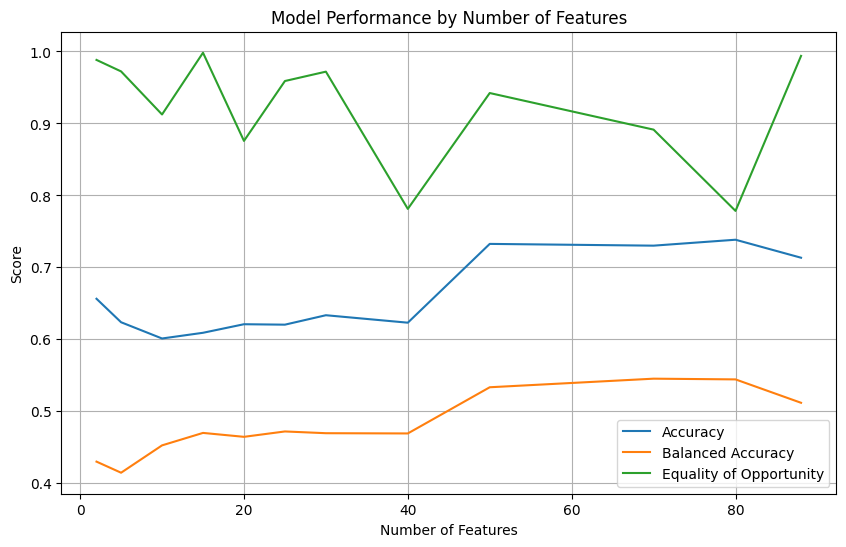

In [148]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(n_features, acc_results, label='Accuracy')
plt.plot(n_features, bal_acc_results, label='Balanced Accuracy')
plt.plot(n_features, eo_results, label='Equality of Opportunity')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Model Performance by Number of Features')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
# top 30 gender features
gender_features = ['HNRdBACF_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_amean', 'slopeV0-500_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'mfcc4V_sma3nz_amean',
       'mfcc4_sma3_amean', 'jitterLocal_sma3nz_stddevNorm',
       'F1frequency_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean',
       'slopeUV0-500_sma3nz_amean', 'mfcc3_sma3_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_stddevNorm',
       'F2frequency_sma3nz_stddevNorm', 'F3frequency_sma3nz_stddevNorm',
       'F1frequency_sma3nz_amean', 'spectralFluxV_sma3nz_stddevNorm',
       'hammarbergIndexV_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean',
       'shimmerLocaldB_sma3nz_amean', 'F2bandwidth_sma3nz_stddevNorm',
       'slopeUV500-1500_sma3nz_amean', 'F2frequency_sma3nz_amean',
       'spectralFlux_sma3_stddevNorm', 'spectralFlux_sma3_amean',
       'mfcc1V_sma3nz_amean', 'spectralFluxUV_sma3nz_amean',
       'spectralFluxV_sma3nz_amean']

depression_features = selected_features
print(gender_features)
print(depression_features)

['HNRdBACF_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'slopeV0-500_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'mfcc4V_sma3nz_amean', 'mfcc4_sma3_amean', 'jitterLocal_sma3nz_stddevNorm', 'F1frequency_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean', 'slopeUV0-500_sma3nz_amean', 'mfcc3_sma3_amean', 'shimmerLocaldB_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_stddevNorm', 'F2frequency_sma3nz_stddevNorm', 'F3frequency_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean', 'spectralFluxV_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_stddevNorm', 'mfcc2V_sma3nz_amean', 'shimmerLocaldB_sma3nz_amean', 'F2bandwidth_sma3nz_stddevNorm', 'slopeUV500-1500_sma3nz_amean', 'F2frequency_sma3nz_amean', 'spectralFlux_sma3_stddevNorm', 'spectralFlux_sma3_amean', 'mfcc1V_sma3nz_amean', 'spectralFluxUV_sma3nz_amean', 'spectralFluxV_sma3nz_amean']
Index(['loudness_sma3_pctlrange0-2', 'loudness_sma3_percentile80

In [150]:
final_features = [i for i in depression_features[:70] if i not in gender_features]
print(final_features)
print(len(final_features))

['loudness_sma3_pctlrange0-2', 'loudness_sma3_percentile80.0', 'loudness_sma3_amean', 'loudness_sma3_percentile50.0', 'loudness_sma3_meanRisingSlope', 'loudness_sma3_meanFallingSlope', 'loudness_sma3_stddevRisingSlope', 'equivalentSoundLevel_dBp', 'loudness_sma3_stddevFallingSlope', 'loudness_sma3_percentile20.0', 'logRelF0-H1-H2_sma3nz_amean', 'loudness_sma3_stddevNorm', 'F3frequency_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F2amplitudeLogRelF0_sma3nz_amean', 'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'F3amplitudeLogRelF0_sma3nz_amean', 'loudnessPeaksPerSec', 'mfcc2_sma3_amean', 'F1bandwidth_sma3nz_amean', 'MeanUnvoicedSegmentLength', 'hammarbergIndexV_sma3nz_amean', 'F1bandwidth_sma3nz_stddevNorm', 'mfcc1_sma3_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'mfcc1V_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean', 'MeanVoicedSegmentLengthSec', 'F1amplitudeLogRelF0_sma3nz_amean', 'StddevVoicedSegmentLengthSec

In [151]:
#Final model

xgb_clf = xgb.XGBClassifier(booster = "gbtree", eta = 0.01, n_estimators = 150, max_depth = 15, min_child_weight = 1, gamma = 0.5)


xgb_clf.fit(x_train_scaled[final_features], y_train_depression)


# Predict on test set
y_pred = xgb_clf.predict(x_test_scaled[final_features])

# Accuracies
acc = accuracy_score(y_test_depression, y_pred)
bal_acc = balanced_accuracy_score(y_test_depression, y_pred)

# EO calculation
df = pd.DataFrame({'Gender': testdf['Gender'], 'Depression': y_test_depression, 'Predictions': y_pred})
female_tpr = calculate_tpr(df[df['Gender'] == 0], 0)
male_tpr = calculate_tpr(df[df['Gender'] == 1], 1)
eo = 1 - abs(male_tpr - female_tpr)

print("Acc: ",acc)
print("Bal Acc: ",bal_acc)
print("male_tpr: ",male_tpr)
print("female_tpr: ",female_tpr)
print("eo: ",eo)

Acc:  0.7628048780487805
Bal Acc:  0.5002602107563363
male_tpr:  0.07920792079207921
female_tpr:  0.0549645390070922
eo:  0.975756618215013


In [152]:
testdf.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Participant_ID,Depression,Gender
0,32.160255,0.200581,23.145561,35.632530,36.815937,13.670376,-65.049820,0.000000,28.641510,0.000000,...,0.840336,1.754386,0.145000,0.065000,0.266667,0.164384,-24.856180,305,0,1
1,28.780031,0.074786,27.129395,28.150295,31.058764,3.929369,52.741413,13.374495,3.220003,4.861248,...,3.070175,3.139013,0.170000,0.140712,0.145000,0.123119,-20.882643,305,0,1
2,29.038708,0.144522,25.411283,25.819115,34.090847,8.679564,65.176770,0.000000,-13.047282,0.000000,...,1.190476,2.531646,0.075000,0.015000,0.196667,0.110252,-21.540741,305,0,1
3,24.198637,0.077389,22.477812,24.032180,25.971500,3.493689,106.853410,211.200330,14.058883,9.024993,...,2.503682,1.699926,0.166087,0.145086,0.385000,0.467377,-23.443264,305,0,1
4,23.637993,0.130217,18.551594,25.037369,26.020950,7.469356,40.880257,21.864357,4.867825,10.950583,...,1.754386,2.409639,0.112500,0.078859,0.224000,0.308649,-31.355045,305,0,1


In [153]:
predictions_df = pd.DataFrame({'Participant_ID': testdf['Participant_ID'], 'Depression_Prediction': y_pred})
true_df = pd.DataFrame({'Participant_ID': testdf['Participant_ID'], 'True_value' : testdf['Depression']})
true_df=true_df.groupby('Participant_ID').agg({
    'True_value': lambda x: x.mode()[0]
}).reset_index()

In [154]:
predictions_df.head()

,Participant_ID,Depression_Prediction
0,305,0
1,305,0
2,305,0
3,305,0
4,305,0


In [155]:
true_df

,Participant_ID,True_value
0,305,0
1,312,0
2,315,0
3,320,1
4,321,1
5,325,1
6,336,0
7,348,1
8,355,1
9,362,1


In [156]:
# Load true labels for evaluation
true_labels = pd.read_csv('labels.csv')  # Assuming you have true labels stored in a CSV file

# # Load predictions from your model
# predictions_df = pd.read_csv('predictions.csv')  # Assuming you have predictions stored in a DataFrame

# Aggregate predictions at the participant level
aggregated_predictions = predictions_df.groupby('Participant_ID').agg({
    'Depression_Prediction': lambda x: x.mode()[0] # Take the mode (majority vote) of depression predictions for each participant
     # Take the mode (majority vote) of gender predictions for each participant
}).reset_index()

In [157]:
aggregated_predictions

,Participant_ID,Depression_Prediction
0,305,0
1,312,0
2,315,0
3,320,0
4,321,0
5,325,0
6,336,0
7,348,0
8,355,0
9,362,0


In [158]:
# Accuracies
acc = accuracy_score(true_df['True_value'], aggregated_predictions['Depression_Prediction'])
bal_acc = balanced_accuracy_score(y_test_depression, y_pred)


# female_tpr = calculate_tpr(df[df['Gender'] == 0], 0)
# male_tpr = calculate_tpr(df[df['Gender'] == 1], 1)
# eo = 1 - abs(male_tpr - female_tpr)

In [159]:
print(acc,bal_acc)

0.7 0.5002602107563363


In [160]:
#Final model

xgb_clf = xgb.XGBClassifier(booster = "dart", eta = 0.01, n_estimators = 150, max_depth = 15, min_child_weight = 1, gamma = 0.5)


xgb_clf.fit(x_train_scaled[selected_features[0:88]], y_train_depression)


# Predict on test set
y_pred = xgb_clf.predict(x_test_scaled[selected_features[0:88]])

# Accuracies
acc = accuracy_score(y_test_depression, y_pred)
bal_acc = balanced_accuracy_score(y_test_depression, y_pred)

# EO calculation
df = pd.DataFrame({'Gender': testdf['Gender'], 'Depression': y_test_depression, 'Predictions': y_pred})
female_tpr = calculate_tpr(df[df['Gender'] == 0], 0)
male_tpr = calculate_tpr(df[df['Gender'] == 1], 1)
eo = 1 - abs(male_tpr - female_tpr)

print("Acc: ",acc)
print("Bal Acc: ",bal_acc)
print("male_tpr: ",male_tpr)
print("female_tpr: ",female_tpr)
print("eo: ",eo)

Acc:  0.711890243902439
Bal Acc:  0.49131672393220144
male_tpr:  0.0594059405940594
female_tpr:  0.13120567375886524
eo:  0.9282002668351942


In [161]:
predictions_df = pd.DataFrame({'Participant_ID': testdf['Participant_ID'], 'Depression_Prediction': y_pred})
true_df = pd.DataFrame({'Participant_ID': testdf['Participant_ID'], 'True_value' : testdf['Depression']})
true_df=true_df.groupby('Participant_ID').agg({
    'True_value': lambda x: x.mode()[0]
}).reset_index()

In [162]:
# Load true labels for evaluation
true_labels = pd.read_csv('labels.csv')  # Assuming you have true labels stored in a CSV file

# # Load predictions from your model
# predictions_df = pd.read_csv('predictions.csv')  # Assuming you have predictions stored in a DataFrame

# Aggregate predictions at the participant level
aggregated_predictions = predictions_df.groupby('Participant_ID').agg({
    'Depression_Prediction': lambda x: x.mode()[0] # Take the mode (majority vote) of depression predictions for each participant
     # Take the mode (majority vote) of gender predictions for each participant
}).reset_index()

In [163]:
acc = accuracy_score(true_df['True_value'], aggregated_predictions['Depression_Prediction'])
bal_acc = balanced_accuracy_score(y_test_depression, y_pred)

print(acc,bal_acc)

0.65 0.49131672393220144


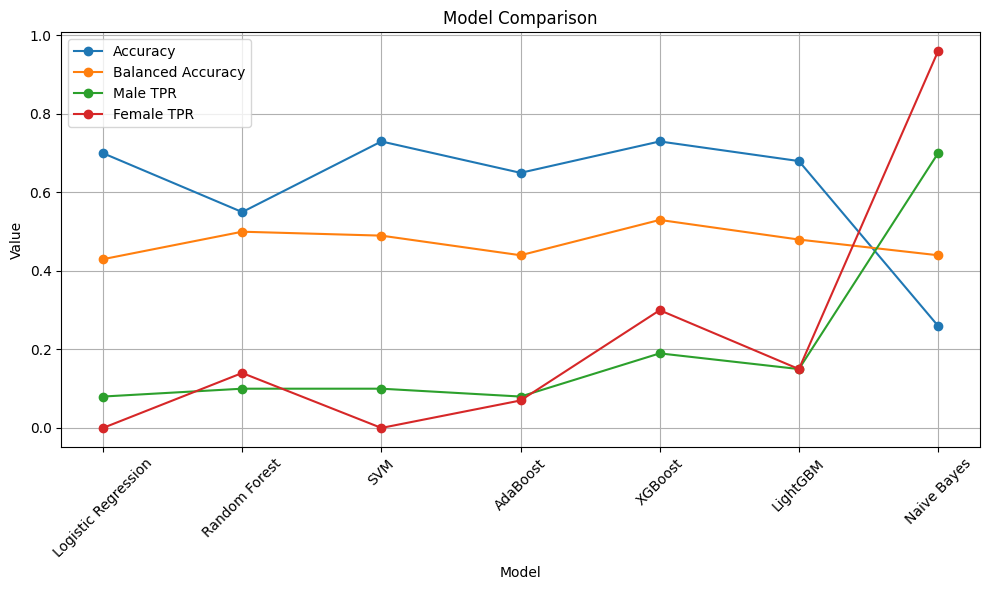

In [164]:
import matplotlib.pyplot as plt
import pandas as pd

# Data setup
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'AdaBoost', 'XGBoost', 'LightGBM', 'Naive Bayes'],
    'Accuracy': [0.70, 0.55, 0.73, 0.65, 0.73, 0.68, 0.26],
    'Balanced Accuracy': [0.43, 0.5, 0.49, 0.44, 0.53, 0.48, 0.44],
    'Male TPR': [0.08, 0.10, 0.10, 0.08, 0.19, 0.15, 0.70],
    'Female TPR': [0.0, 0.14, 0.0, 0.07, 0.30, 0.15, 0.96]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:  # Skip the 'Model' column
    plt.plot(df['Model'], df[column], marker='o', label=column)

plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()
